# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.001
0.0
0.0
-0.001
0.0
-0.001
-0.001
0.0
0.0
0.0
0.0
0.002
0.002
0.001
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.002
-0.003
-0.003
-0.002
-0.002
-0.001
-0.002
-0.004
-0.003
-0.003
1.003
1.003
1.002
1.98
1.982
1.983
1.982
1.981
2.987
2.987
2.986
2.986
3.963
3.965
3.967
3.967
3.966
4.942
4.942
4.942
4.941
5.917
5.919
5.921
5.918
5.919
6.655
6.657
6.658
6.657
6.657
7.396
7.398
7.4
7.399
7.4
8.388
8.391
8.392
8.391
8.392
9.39
9.392
9.394
9.394
9.393
9.393
10.393
10.395
10.393
10.394
11.4
11.4
11.398
11.397
12.403
12.403
12.402
12.401
13.381
13.381
13.38
13.381
14.344
14.344
14.343
14.343
15.301
15.304
15.304
15.304
15.304
16.272
16.274
16.276
16.275
16.275
17.255
17.255
17.254
17.253
18.224
18.226
18.227
18.227
18.227
19.232
19.232
19.23
19.23
20.235
20.235
20.234
20.234
21.214
21.214
21.214
21.214
21.717
21.717
21.717
22.222
22.222
22.22
22.219
23.224
23.224
23.221
23.221
24.227
24.226
24.224
24.224
25.228
25.228
25.226
25.226
26.208
26.208
26.206
26.206
27.211
27.21
27.208
27.208
28.2

56.865
56.864
56.864
56.864
56.864
56.864
56.864
56.864
56.864
56.864
56.864
56.864
56.864
56.864
56.863
56.863
56.862
56.861
56.861
56.974
56.975
56.982
56.984
56.984
56.984
56.984
56.984
56.984
56.979
57.002
57.003
57.003
57.001
57.001
57.001
57.001
57.001
57.0
57.0
57.0
57.0
56.999
56.999
56.999
56.999
56.999
56.999
56.999
56.998
56.998
56.997
56.997
56.997
56.997
56.997
56.997
56.998
56.998
56.998
56.998
56.998
56.998
56.998
56.997
56.997
57.112
57.112
57.112
57.112
57.112
57.111
57.111
57.111
57.111
57.111
57.111
57.111
57.111
57.111
57.111
57.111
57.11
57.11
57.109
57.109
57.109
57.109
57.109
57.108
57.108
57.108
57.108
57.108
57.108
57.107
57.107
57.107
57.107
57.107
57.106
57.106
57.106
57.106
57.106
57.106
57.106
57.106
57.107
57.107
57.107
57.106
57.106
57.106
57.105
57.105
57.308
57.309
57.309
57.309
57.306
57.306
57.306
57.302
57.327
57.327
57.327
57.327
57.327
57.324
57.328
57.328
57.328
57.328
57.326
57.324
57.325
57.325
57.327
57.328
57.328
57.326
57.326
57.326
57.651
57

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.001
1,2,0.000
2,4,0.000
3,6,-0.001
4,8,0.000
...,...,...
1427,2854,59.152
1428,2856,59.152
1429,2858,59.152
1430,2860,59.152


<IPython.core.display.Javascript object>


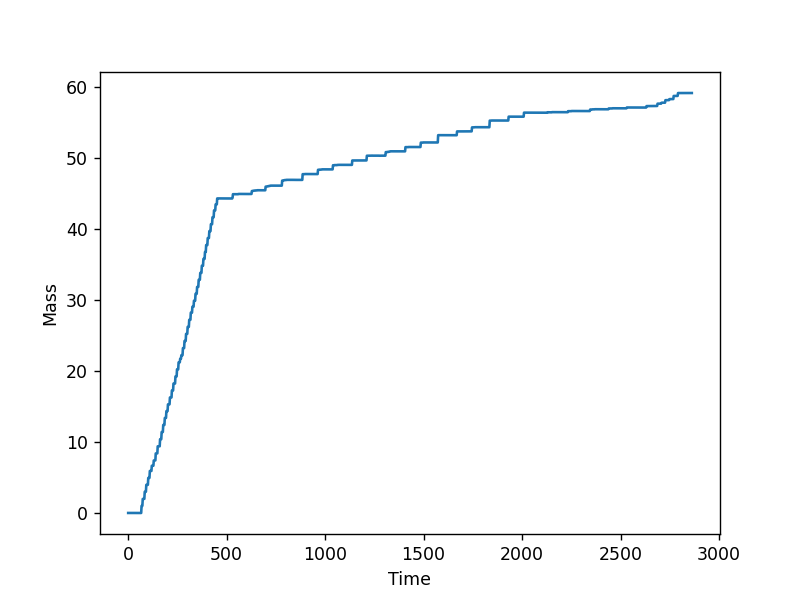

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_060623_S577-582.csv')